In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Initial required libraries

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the Dataset
*About the data:* <br>
The data is an twitter comments of various US Airlines having sentiments of the tweet: positive, negative or neutral.

*Columns:* <br>


1.   text: The actual tweet
2.   airline: Name of the airline tweeted about
3. latitude, longitude: Location of the tweet
4. airline_sentiment_confidence : Confidence of the sentiment classification of the tweet
5. airline_sentiment: Sentiment of the tweet


In [ ]:
#intializing global variables
data = pd.read_csv('https://raw.githubusercontent.com/anjaliasha123/Data_Visualization_projects/master/Streamlit_python/Tweets.csv')
print(data.text.head(2))
print(data.shape)
print(data.airline_sentiment.value_counts())
num_of_categories = 2363
data = data.reindex(np.random.permutation(data.index))
positive = data[data['airline_sentiment'] == 'positive'][:num_of_categories]
negative = data[data['airline_sentiment'] == 'negative'][:num_of_categories]
neutral = data[data['airline_sentiment'] == 'neutral'][:num_of_categories]
data = pd.concat([positive,negative,neutral], ignore_index=True)
data = data.reindex(np.random.permutation(data.index))
print(data.shape)

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
Name: text, dtype: object
(14640, 12)
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
(7089, 12)


For the purpose of this project, we are considering only the 'text' column of the Xdata

#MOST COMMON VARIABLES:


*   most_common : for the most common words of the dictionary
*   max_len : maximum length of the sequence to be truncated into
* epochs : Number of times the training of the model must be done. It is a value that determines when a model should stop its training explicitly.
* embed_dim : Dimension of a word vector
* batch_size : size of a batch to train during each itteration of model training


In [ ]:
most_common = 20000 
max_len = 100 
epochs = 10
embed_dim = 100
batch_size = 100

#Data Preprocessing



*   We need to convert y labels into categorical values
*   We need to convert the 



In [ ]:
dataCopy = data

Preprocessing the y labels(dependednt variables). 

In [ ]:
data['LABEL'] = 0
data.loc[data.airline_sentiment == 'positive', 'LABEL'] = 0
data.loc[data.airline_sentiment == 'negative', 'LABEL'] = 1
data.loc[data.airline_sentiment == 'neutral', 'LABEL'] = 2
print(data['LABEL'][:10])

2506    1
4219    1
5545    2
5712    2
5367    2
966     0
2097    0
6050    2
2505    1
5034    2
Name: LABEL, dtype: int64


In [ ]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(data['LABEL'], num_classes=3)
print(labels[:10])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


#Preprocessing the Tweets


*   Removing the name of the airlines @airlinename from the tweets
*   Replacing abbrieviations from the tweets
*   Removing meaningless stopwords
*   Converting texts into lowercase



In [ ]:
import re
from tqdm import tqdm
def preProcessTweets(X,colName):
  X[colName] = X[colName].str.replace('@VirginAmerica','')
  X[colName] = X[colName].str.replace('@united','')
  X[colName] = X[colName].str.replace('@SouthwestAir','')
  X[colName] = X[colName].str.replace('@JetBlue','')
  X[colName] = X[colName].str.replace('@AmericanAir','')
  X[colName] = X[colName].str.replace('@USAirways','')
  #stopwords
  # https://gist.github.com/sebleier/554280
  stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
              "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
              'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
              'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
              'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
              'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
              'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
              'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
              'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
              'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
              's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
              've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
              "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
              "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
              'won', "won't", 'wouldn', "wouldn't"]
  #replacing abbreiviations
  def removeAbbrieves(text):
    words = text.split(' ')
    text = ' '.join([w.lower() for w in words])
    text = re.sub(r"won't","will not",text)
    text = re.sub(r"can\'t", "can not",text)
    text = re.sub(r"n\'t", " not", text)
    text= re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have",text)
    text = re.sub(r"\'m", " am", text)
    return text
  #combining all
  preprocessed_text = []
  for sentence in tqdm(X[colName].values):
      sent = removeAbbrieves(sentence)
      sent = sent.replace('\\r', ' ')
      sent = sent.replace('\\n', ' ')
      sent = sent.replace('\\"', ' ')
      sent = sent.replace('http"', ' ')
      sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
      sent = re.sub('[0-9]+', ' ', sent)
      sent = ' '.join(e for e in sent.split(' ') if e.lower() not in stopwords)
      preprocessed_text.append(sent.lower().strip())
  return preprocessed_text

  



In [ ]:
X = data['text'].to_frame()
X.head(2)

,text
2506,@AmericanAir Hey AA - can you help with an iti...
4219,@united thank you for letting me down.My lugga...


In [ ]:
X['text'] = preProcessTweets(X,'text')
X.head(2)

100%|██████████| 7089/7089 [00:00<00:00, 12879.40it/s]


,text
2506,hey aa help itinerary plat custy stuck pvr pho...
4219,thank letting luggage still denver phl neverag...


In [ ]:
data['processedText'] = X['text']
data[['text','processedText']].head(2)

,text,processedText
2506,@AmericanAir Hey AA - can you help with an iti...,hey aa help itinerary plat custy stuck pvr pho...
4219,@united thank you for letting me down.My lugga...,thank letting luggage still denver phl neverag...


#Word Clouds

In [ ]:
positiveTweets = " ".join(data[data.airline_sentiment == 'positive'].processedText.values)
negativeTweets = " ".join(data[data.airline_sentiment == 'negative'].processedText.values)
neutralTweets = " ".join(data[data.airline_sentiment == 'neutral'].processedText.values)

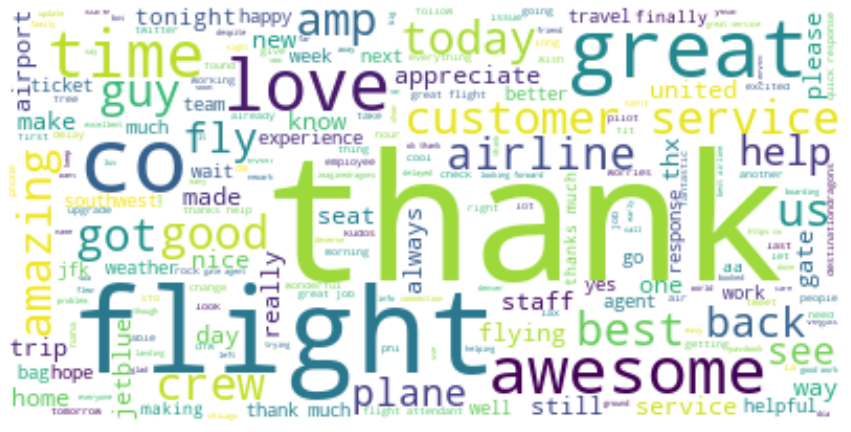

In [ ]:
from wordcloud import WordCloud 
wordcloud = WordCloud(background_color="white").generate(positiveTweets)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

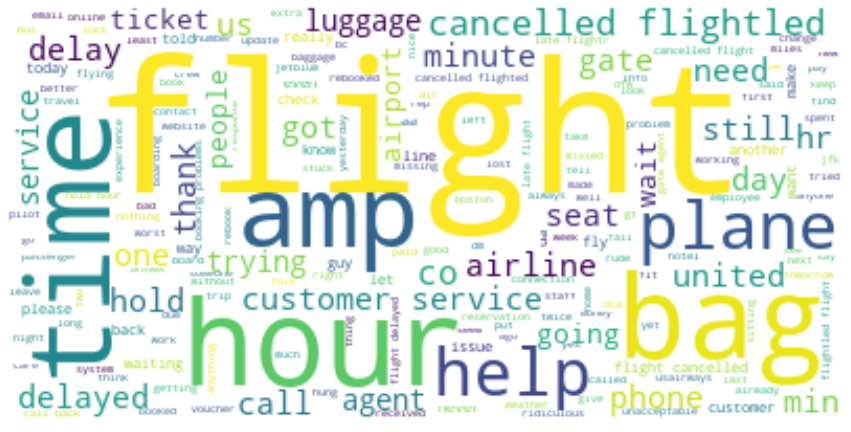

In [ ]:
wordcloud = WordCloud(background_color="white").generate(negativeTweets)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

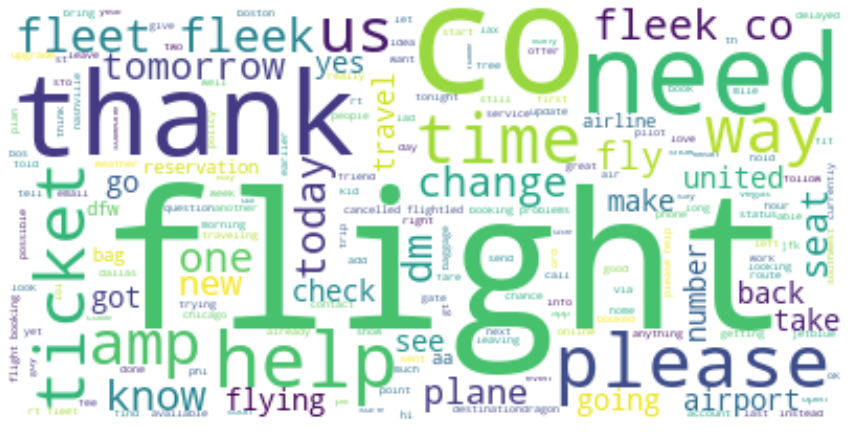

In [ ]:
wordcloud = WordCloud(background_color="white").generate(neutralTweets)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Approaching towards Deep learning Model


*   dataPreprocessing() : to convert pre-processed tweets into tokens and then created into padded sequences of the word indexes
*   List item



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def dataPreprocessing(most_common,X,colName):

  tok = Tokenizer(num_words = most_common,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
  tok.fit_on_texts(X[colName].values)
  sequences = tok.texts_to_sequences(X[colName].values)
  word_index = tok.word_index
  print('Found %s unique tokens.' % len(word_index))
  paddedX = pad_sequences(sequences, maxlen = max_len,padding='post')
  return paddedX, len(word_index), word_index,tok

pX, size_unique_wordsX, wordIndex,tok = dataPreprocessing(most_common,data,'processedText')

Found 9175 unique tokens.


#Train-test split
* 80% train data and 20 % test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pX , labels, test_size=0.2)

In [ ]:
print('Training shape X: {} y:{}'.format(X_train.shape, y_train.shape))
print('Testing shape X: {} y:{}'.format(X_test.shape, y_test.shape))

Training shape X: (5671, 100) y:(5671, 3)
Testing shape X: (1418, 100) y:(1418, 3)


#Creating the WordToVector dictionary

In [ ]:
def createEmbeddingMatrix(word_index):
  word2vec = {}
  with open(os.path.join('/content/gdrive/My Drive/glove.6B.100d.txt'),encoding='utf8') as f:
      for line in f:
          values = line.rstrip().rsplit(' ')
          word = values[0]
          coefs = np.asarray(values[1:], dtype='float32')
          word2vec[word] = coefs
  num_of_words = min(most_common, len(word_index)+1)
  embedding_matrix = np.zeros((num_of_words,embed_dim))
  for word,i in word_index.items():
      if i < num_of_words:
          embedd_vec = word2vec.get(word)
          if embedd_vec is not None:
              embedding_matrix[i] = embedd_vec
  return embedding_matrix, num_of_words

embedMatrix, num_of_words = createEmbeddingMatrix(wordIndex)

In [ ]:
embedMatrix.shape

(9176, 100)

#Creating the Model

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D,GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import  Adam

In [ ]:
#creating the embedding layer
embedding_layer = Embedding(input_dim=num_of_words,output_dim=max_len,weights=[embedMatrix],input_length=max_len,trainable=False)
#input_layer
input_layer = Input((max_len,),name='InputLayer')
#embedding layer
embedding_layer = embedding_layer(input_layer)
#bi-directional LSTM layer
lstm = Bidirectional(LSTM(50,return_sequences=True))(embedding_layer)
#dropout layer
drop_lstm = Dropout(0.3)(lstm)
#CNN layers
first_conv_layer = Conv1D(filters = 128, kernel_size = 2, activation='relu')(drop_lstm)
second_conv_layer = Conv1D(filters = 128, kernel_size = 3, activation='relu')(drop_lstm)
third_conv_layer = Conv1D(filters = 128, kernel_size = 4, activation='relu')(drop_lstm)
#maxpooling layers
first_max_pooling_layer =  MaxPooling1D((max_len - 2)+1)(first_conv_layer)
second_max_pooling_layer =  MaxPooling1D((max_len - 3)+1)(second_conv_layer)
third_max_pooling_layer =  MaxPooling1D((max_len - 4)+1)(third_conv_layer)
merged = Concatenate(axis=1)([first_max_pooling_layer,second_max_pooling_layer,third_max_pooling_layer])
flatten = Flatten()(merged)
drop_cnn = Dropout(0.3)(flatten)
preoutput_layer = Dense(64, use_bias=False, activation='sigmoid')(drop_cnn)
output_layer = Dense(3, use_bias=False, activation='softmax')(preoutput_layer)
model = Model(input_layer,output_layer)
model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=1e-4),
        metrics=['accuracy']
             )

In [ ]:
from tensorflow.keras.callbacks import Callback
import tensorflow

class MyThresholdCallback(tensorflow.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        acc = logs["accuracy"]
        if acc >= self.threshold:
            self.model.stop_training = True


callback=MyThresholdCallback(threshold=0.75)
lstmcnn = model.fit(
           pX, labels,
            batch_size=30,
            epochs=200,
            validation_split=0.2,
            callbacks=[callback]  
            )

Epoch 1/200
190/190 [==============================] - 16s 65ms/step - loss: 1.0510 - accuracy: 0.4699 - val_loss: 0.9643 - val_accuracy: 0.5698
Epoch 2/200
190/190 [==============================] - 11s 60ms/step - loss: 0.8774 - accuracy: 0.6002 - val_loss: 0.7891 - val_accuracy: 0.6446
Epoch 3/200
190/190 [==============================] - 11s 60ms/step - loss: 0.7688 - accuracy: 0.6621 - val_loss: 0.7295 - val_accuracy: 0.6841
Epoch 4/200
190/190 [==============================] - 11s 60ms/step - loss: 0.7222 - accuracy: 0.6939 - val_loss: 0.7025 - val_accuracy: 0.6819
Epoch 5/200
190/190 [==============================] - 11s 60ms/step - loss: 0.6983 - accuracy: 0.7069 - val_loss: 0.6855 - val_accuracy: 0.7017
Epoch 6/200
190/190 [==============================] - 11s 60ms/step - loss: 0.6825 - accuracy: 0.7170 - val_loss: 0.6770 - val_accuracy: 0.7087
Epoch 7/200
190/190 [==============================] - 11s 60ms/step - loss: 0.6697 - accuracy: 0.7254 - val_loss: 0.6681 - val_ac

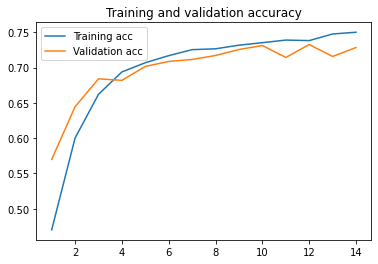

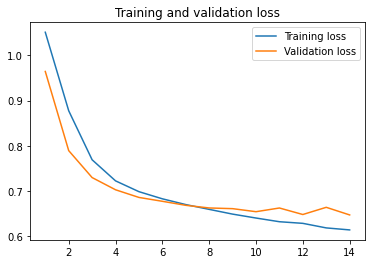

In [ ]:
import matplotlib.pyplot as plt

acc = lstmcnn.history['accuracy']
val_acc = lstmcnn.history['val_accuracy']
loss = lstmcnn.history['loss']
val_loss = lstmcnn.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save("bilstmCNNTweetNew.h5")

#Model evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:

def plot_confusion_matrix(model, X_test, y_test):
    import numpy as np
    import pandas as pd
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    sentiment_classes = ['positive', 'negative', 'neutral']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    return cm

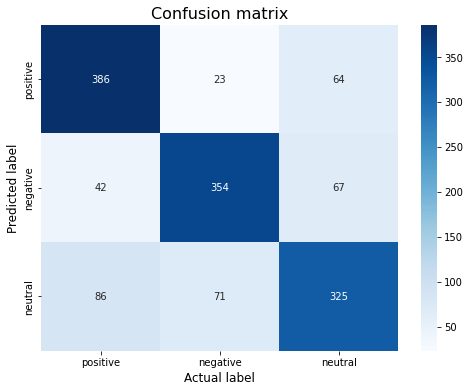

In [ ]:
cm = plot_confusion_matrix(model, X_test, y_test)

In [ ]:
print('Prediction Precision: ')
print('Precision of Positive class : ')
ap = cm[0][0]/(cm[0][0]+cm[0][1]+cm[0][2])
print((cm[0][0]/(cm[0][0]+cm[0][1]+cm[0][2])))
print('Precision of Negative class in: ')
an = cm[1][1]/(cm[1][1]+cm[1][0]+cm[1][2])
print((cm[1][1]/(cm[1][1]+cm[1][0]+cm[1][2])))
print('Precision of Neutral class in:')
anu = cm[2][2]/(cm[2][2]+cm[2][0]+cm[2][1])
print((cm[2][2]/(cm[2][2]+cm[2][0]+cm[2][1])))

Prediction Precision: 
Precision of Positive class : 
0.8160676532769556
Precision of Negative class in: 
0.7645788336933045
Precision of Neutral class in:
0.6742738589211619


In [ ]:
print('Recall: ')
print('Recall for Positive class :')
rp = (cm[0][0]/(cm[0][0]+cm[1][0]+cm[2][0]))
print((cm[0][0]/(cm[0][0]+cm[1][0]+cm[2][0])))
print('Recall for Negative class :')
rn = (cm[1][1]/(cm[1][1]+cm[0][1]+cm[2][1]))
print((cm[1][1]/(cm[1][1]+cm[0][1]+cm[2][1])))
print('Recall for Neutral class :')
rnu = (cm[2][2]/(cm[2][2]+cm[1][2]+cm[0][2]))
print((cm[2][2]/(cm[2][2]+cm[1][2]+cm[0][2])))

Recall: 
Recall for Positive class :
0.7509727626459144
Recall for Negative class :
0.7901785714285714
Recall for Neutral class :
0.7127192982456141


In [ ]:
print('F-1 scores:')
print('Positive class:')
print((2*ap*rp)/(ap+rp))
print('Negative class:')
print((2*an*rn)/(an+rn))
print('Neutral class:')
print((2*anu*rnu)/(anu+rnu))

F-1 scores:
Positive class:
0.7821681864235056
Negative class:
0.7771679473106474
Neutral class:
0.6929637526652452


Testing sample tweets

In [ ]:
X = dataCopy[int(len(dataCopy)*0.8):][['text','airline_sentiment']]
X.head(2)

,text,airline_sentiment
415,@JetBlue They just came out. Thanks for the fo...,positive
3495,@united I flew back w other company since Unit...,negative


In [ ]:
processed = pd.DataFrame()
processed['processedText'] = preProcessTweets(X,'text')
processed['processedText'].head(2)

100%|██████████| 1418/1418 [00:00<00:00, 14489.86it/s]


0                              came thanks follow best
1    flew back w company since united didnt earlier...
Name: processedText, dtype: object

In [ ]:
processed

,processedText
0,came thanks follow best
1,flew back w company since united didnt earlier...
2,not sure anything help would great
3,flying w infant st time bring canister powder...
4,must send note good words
...,...
1413,book flight hawaii
1414,fortunemagazine always tell everyone fly south...
1415,possible add travel arranged employer upcoming...
1416,flight omaha chicago en route nyc seating part...


In [ ]:
labels = ['positive', 'negative','neutral']
txt = processed.iloc[0].tolist()
seq = tok.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
print(pred, labels[np.argmax(pred)])

[[0.8470269  0.01862804 0.13434514]] positive


In [ ]:
txt = processed.iloc[1].tolist()
seq = tok.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
print(pred, labels[np.argmax(pred)])

[[0.24706644 0.5375139  0.21541964]] negative


In [ ]:
print('Actual Tweet: {}'.format(X.text.iloc[10]))
print('Cleaned Tweet: {}'.format(processed.iloc[10]))
print('Actual Prediction Tweet: {}'.format(X.airline_sentiment.iloc[10]))
txt = processed.iloc[10].tolist()
seq = tok.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
print('Predicted Sentiment')
print(pred, labels[np.argmax(pred)])

Actual Tweet:   I just reserved a flight with my companion certificate, where do I mail the certificate for verification???? THX!!!
Cleaned Tweet: processedText    reserved flight companion certificate mail cer...
Name: 10, dtype: object
Actual Prediction Tweet: neutral
Predicted Sentiment
[[0.11416478 0.21057259 0.67526263]] neutral


In [ ]:
print('Actual Tweet: {}'.format(X.text.iloc[20]))
print('Cleaned Tweet: {}'.format(processed.iloc[20]))
print('Actual Prediction Tweet: {}'.format(X.airline_sentiment.iloc[20]))
txt = processed.iloc[20].tolist()
seq = tok.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
print('Predicted Sentiment')
print(pred, labels[np.argmax(pred)])

Actual Tweet:  you wont allow calls? My husband has a ticket but it looks like all the seats are taken? I cant even call.
Cleaned Tweet: processedText    wont allow calls husband ticket looks like sea...
Name: 20, dtype: object
Actual Prediction Tweet: neutral
Predicted Sentiment
[[0.03169357 0.8745268  0.09377967]] negative


In [ ]:
print('Actual Tweet: {}'.format(X.text.iloc[21]))
print('Cleaned Tweet: {}'.format(processed.iloc[21]))
print('Actual Prediction Tweet: {}'.format(X.airline_sentiment.iloc[21]))
txt = processed.iloc[21].tolist()
seq = tok.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
print('Predicted Sentiment')
print(pred, labels[np.argmax(pred)])

Actual Tweet:  Thanks for the quick response - it's appreciated!
Cleaned Tweet: processedText    thanks quick response appreciated
Name: 21, dtype: object
Actual Prediction Tweet: positive
Predicted Sentiment
[[0.9547574  0.00678928 0.03845336]] positive


In [ ]:
print('Actual Tweet: {}'.format(X.text.iloc[45]))
print('Cleaned Tweet: {}'.format(processed.iloc[45]))
print('Actual Prediction Tweet: {}'.format(X.airline_sentiment.iloc[45]))
txt = processed.iloc[45].tolist()
seq = tok.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
print('Predicted Sentiment')
print(pred, labels[np.argmax(pred)])

Actual Tweet:  nice touch on the passbook integration!
Cleaned Tweet: processedText    nice touch passbook integration
Name: 45, dtype: object
Actual Prediction Tweet: positive
Predicted Sentiment
[[0.6345063  0.07415817 0.29133552]] positive


In [ ]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 1s 20ms/step - loss: 0.6156 - accuracy: 0.7511


[0.6156167984008789, 0.7510578036308289]